# Lab Assignment 2 - Part C: Naive Bayes for Spam Detection
Please refer to the `README.pdf` for full laboratory instructions.


## Problem Statement
In this part, you will implement a **Naive Bayes classifier** for spam email detection using the Spambase dataset.

### Dataset Description
The Spambase dataset contains 4601 email samples with 57 features:
- **Features 1-48**: Word frequencies (percentage of words matching specific words)
- **Features 49-54**: Character frequencies (`;`, `(`, `[`, `!`, `$`, `#`)
- **Features 55-57**: Capital letter statistics
- **Label**: 1 = spam, 0 = not spam

### Your Tasks
1. **Implement Gaussian Naive Bayes** from scratch
2. **Train and evaluate** your classifier (accuracy, precision, recall, F1-score)
3. **Feature analysis**: Identify top discriminative features
4. **Discussion**: Why does Naive Bayes work for spam detection?


## Setup


In [1]:
%pip install ucimlrepo


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Library declarations
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo


## Load the Spambase Dataset


In [4]:
# Fetch Spambase dataset from UCI ML Repository
spambase = fetch_ucirepo(id=94)

# Get features and labels
X = spambase.data.features.values
y = spambase.data.targets.values.ravel()

print(f"Dataset shape: {X.shape}")
print(f"Dataset shape: {X[1,:]}")
print(f"Number of spam emails: {np.sum(y == 1)}")
print(f"Number of non-spam emails: {np.sum(y == 0)}")
print(f"\nFeature names: {list(spambase.data.features.columns[:10])}...")  # First 10 features


Dataset shape: (4601, 57)
Dataset shape: [2.100e-01 2.800e-01 5.000e-01 0.000e+00 1.400e-01 2.800e-01 2.100e-01
 7.000e-02 0.000e+00 9.400e-01 2.100e-01 7.900e-01 6.500e-01 2.100e-01
 1.400e-01 1.400e-01 7.000e-02 2.800e-01 3.470e+00 0.000e+00 1.590e+00
 0.000e+00 4.300e-01 4.300e-01 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 7.000e-02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 1.320e-01 0.000e+00 3.720e-01 1.800e-01 4.800e-02 5.114e+00 1.010e+02
 1.028e+03]
Number of spam emails: 1813
Number of non-spam emails: 2788

Feature names: ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail']...


In [5]:
# Split data into training (80%) and testing (20%) sets
def train_test_split(X, y, test_size=0.2, random_state=42):
    """
    Split data into training and testing sets.
    """
    np.random.seed(random_state)
    n_samples = len(y)
    indices = np.random.permutation(n_samples)
    test_size = int(n_samples * test_size)
    
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")


Training set: 3681 samples
Testing set: 920 samples


## Task 1: Implement Gaussian Naive Bayes
Implement a Gaussian Naive Bayes classifier from scratch.

**Key formulas:**
- Class prior: $P(C) = \frac{N_C}{N}$
- Gaussian likelihood: $P(x_i|C) = \frac{1}{\sqrt{2\pi\sigma_{i,C}^2}} \exp\left(-\frac{(x_i - \mu_{i,C})^2}{2\sigma_{i,C}^2}\right)$
- Use **log-probabilities** to avoid numerical underflow!


In [11]:
class GaussianNaiveBayes:
    """
    Gaussian Naive Bayes classifier implementation.
    """
    
    def __init__(self, epsilon=1e-9):
        self.classes = None
        self.priors = None      # P(C) for each class
        self.means = None       # Mean of each feature per class
        self.variances = None   # Variance of each feature per class
        self.epsilon = epsilon
    
    def fit(self, X, y):
        """
        Train the Naive Bayes classifier.
        
        Parameters:
        -----------
        X : numpy array of shape (n_samples, n_features)
        y : numpy array of shape (n_samples,)
        """
        # TODO: Implement training
        # 1. Get unique classes
        # 2. Calculate class priors P(C)
        # 3. Calculate mean and variance for each feature per class
        # Hint: Add a small epsilon to variance to avoid division by zero
        
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        self.means = np.zeros((n_classes, n_features))
        self.variances = np.zeros((n_classes, n_features))
        self.class_priors = np.zeros(n_classes)

        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            
            self.class_priors[idx] = np.log(X_c.shape[0] / n_samples)
            
            self.means[idx, :] = X_c.mean(axis=0)
            
            self.variances[idx, :] = X_c.var(axis=0) + self.epsilon

    
    def _gaussian_log_likelihood(self, x, class_idx):
        """
        Calculate log of Gaussian probability density.
        
        Returns:
        --------
        log_likelihood : float
        """
        # TODO: Implement log of Gaussian PDF
        # log P(x|C) = -0.5 * log(2*pi*var) - 0.5 * (x - mean)^2 / var
        # pass

        mean = self.means[class_idx]
        var = self.variances[class_idx]
        
        numerator = -0.5 * ((x - mean) ** 2) / var
        denominator = -0.5 * np.log(2 * np.pi * var)
        
        return np.sum(numerator + denominator, axis=1)
    
    def predict(self, X):
        """
        Predict class labels for samples in X.
        
        Parameters:
        -----------
        X : numpy array of shape (n_samples, n_features)
        
        Returns:
        --------
        predictions : numpy array of shape (n_samples,)
        """
        # TODO: Implement prediction
        # For each sample:
        #   1. Calculate log P(C) + sum of log P(x_i|C) for each class
        #   2. Return the class with highest log probability

        y_pred = []
        for x in X:
            x_reshaped = x.reshape(1, -1)
            posteriors = []
            
            for idx, c in enumerate(self.classes):
                # Posterior = Log(Prior) + Log(Likelihood)
                prior = self.class_priors[idx]
                likelihood = self._gaussian_log_likelihood(x_reshaped, idx)
                posteriors.append(prior + likelihood)
            
           
            y_pred.append(self.classes[np.argmax(posteriors)])
            
        return np.array(y_pred)
    
    # def predict_proba(self, X):
    #     """
    #     Return probability estimates for samples.
        
    #     Returns:
    #     --------
    #     probabilities : numpy array of shape (n_samples, n_classes)
    #     """
    #     # TODO: (Optional) Implement probability estimation
    #     pass

nb_model = GaussianNaiveBayes(epsilon=1e-9)
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

# X_train, X_test, y_train, y_test

## Task 2: Train and Evaluate
Train your classifier and compute evaluation metrics.


In [12]:
def compute_metrics(y_true, y_pred):
    """
    Compute classification metrics.
    
    Returns:
    --------
    accuracy, precision, recall, f1_score : floats
    """
    # TODO: Implement metrics computation
    # Accuracy = (TP + TN) / (TP + TN + FP + FN)
    # Precision = TP / (TP + FP)
    # Recall = TP / (TP + FN)
    # F1 = 2 * (Precision * Recall) / (Precision + Recall)

    # True Positive (TP)
    TP = np.sum((y_true == 1) & (y_pred == 1))
    
    # True Negative (TN)
    TN = np.sum((y_true == 0) & (y_pred == 0))
    
    # False Positive (FP)
    FP = np.sum((y_true == 0) & (y_pred == 1))
    
    # False Negative (FN): )
    FN = np.sum((y_true == 1) & (y_pred == 0))

    matrix = np.array([
        [TN, FP],
        [FN, TP]
    ])


    total = TP + TN + FP + FN
    if total == 0:
        accuracy = 0.0
    else:
        accuracy = (TP + TN) / total

    if (TP + FP) == 0:
        precision = 0.0
    else:
        precision = TP / (TP + FP)

    if (TP + FN) == 0:
        recall = 0.0
    else:
        recall = TP / (TP + FN)

    if (precision + recall) == 0:
        f1_score = 0.0
    else:
        f1_score = 2 * (precision * recall) / (precision + recall)
    
    return accuracy, precision, recall, f1_score, matrix

       
accuracy, precision, recall, f1_score, matrix = compute_metrics(y_test, y_pred)


print("\n" + "="*40)
print(f"{'MODEL PERFORMANCE REPORT':^40}") 
print("="*40)


print(f"{'Metric':<15} | {'Value':<10}")
print("-" * 40)
print(f"{'Accuracy':<15} | {accuracy:.4f} ({accuracy:.2%})")
print(f"{'Precision':<15} | {precision:.4f}")
print(f"{'Recall':<15} | {recall:.4f}")
print(f"{'F1 Score':<15} | {f1_score:.4f}")

print("-" * 40)
print("Confusion Matrix:")

print(f"{'':<15} {'Pred: 0':<10} {'Pred: 1':<10}")
print(f"{'Actual: 0':<15} {matrix[0,0]:<10} {matrix[0,1]:<10} (TN, FP)")
print(f"{'Actual: 1':<15} {matrix[1,0]:<10} {matrix[1,1]:<10} (FN, TP)")
print("="*40 + "\n")

    


# def confusion_matrix(y_true, y_pred):
#     """
#     Create confusion matrix.
    
#     Returns:
#     --------
#     matrix : numpy array of shape (2, 2)
#         [[TN, FP], [FN, TP]]
#     """
#     # TODO: Implement confusion matrix
#     pass



        MODEL PERFORMANCE REPORT        
Metric          | Value     
----------------------------------------
Accuracy        | 0.8217 (82.17%)
Precision       | 0.7233
Recall          | 0.9385
F1 Score        | 0.8170
----------------------------------------
Confusion Matrix:
                Pred: 0    Pred: 1   
Actual: 0       390        140        (TN, FP)
Actual: 1       24         366        (FN, TP)



## Task 3: Feature Analysis
Identify the most discriminative features for spam detection.


In [14]:
# # TODO: Train your classifier
# nb_classifier = GaussianNaiveBayes()
# nb_classifier.fit(X_train, y_train)

# # TODO: Make predictions
# y_pred = nb_classifier.predict(X_test)

# # TODO: Compute and print metrics
# accuracy, precision, recall, f1, matrix = compute_metrics(y_test, y_pred)
# print(f"Accuracy: {accuracy:.4f}")
# print(f"Precision: {precision:.4f}")
# print(f"Recall: {recall:.4f}")
# print(f"F1-Score: {f1:.4f}")
# print(f"confusion_matrix: {matrix}")



In [15]:
# TODO: Identify top 5 most discriminative features
# Hint: You can measure discriminative power by:
# - Difference in means between classes (normalized by pooled std)
# - Or by feature importance based on model weights

feature_names = list(spambase.data.features.columns)
discriminative_scores = []
n_features = X_train.shape[1]

# TODO: Calculate discriminative score for each feature
for i in range(n_features):

    spam_feat = X_train[y_train == 1, i]
    non_spam_feat = X_train[y_train == 0, i]
    
    # 1. (Mean)
    mu_spam = np.mean(spam_feat)
    mu_non_spam = np.mean(non_spam_feat)
    
    # 2. (Variance)
    var_spam = np.var(spam_feat)
    var_non_spam = np.var(non_spam_feat)
    
    # 3.  Pooled Standard Deviation

    pooled_std = np.sqrt((var_spam + var_non_spam) / 2) + 1e-9
    
    # 4. (Discriminative Score)

    score = np.abs(mu_spam - mu_non_spam) / pooled_std
    
    discriminative_scores.append((i, score))

# sort
discriminative_scores.sort(key=lambda x: x[1], reverse=True)

# top5
top_5_indices = [idx for idx, score in discriminative_scores[:5]]

print("\n" + "="*40)
print(f"{'Top 5 Discriminative Features':^40}")
print("="*40)
for rank, (idx, score) in enumerate(discriminative_scores[:5], 1):
    print(f"{rank}. {feature_names[idx]:<20} Score: {score:.4f}")
print("="*40 + "\n")



     Top 5 Discriminative Features      
1. word_freq_your       Score: 0.8307
2. word_freq_remove     Score: 0.6657
3. word_freq_000        Score: 0.6544
4. char_freq_$          Score: 0.6245
5. word_freq_you        Score: 0.6002



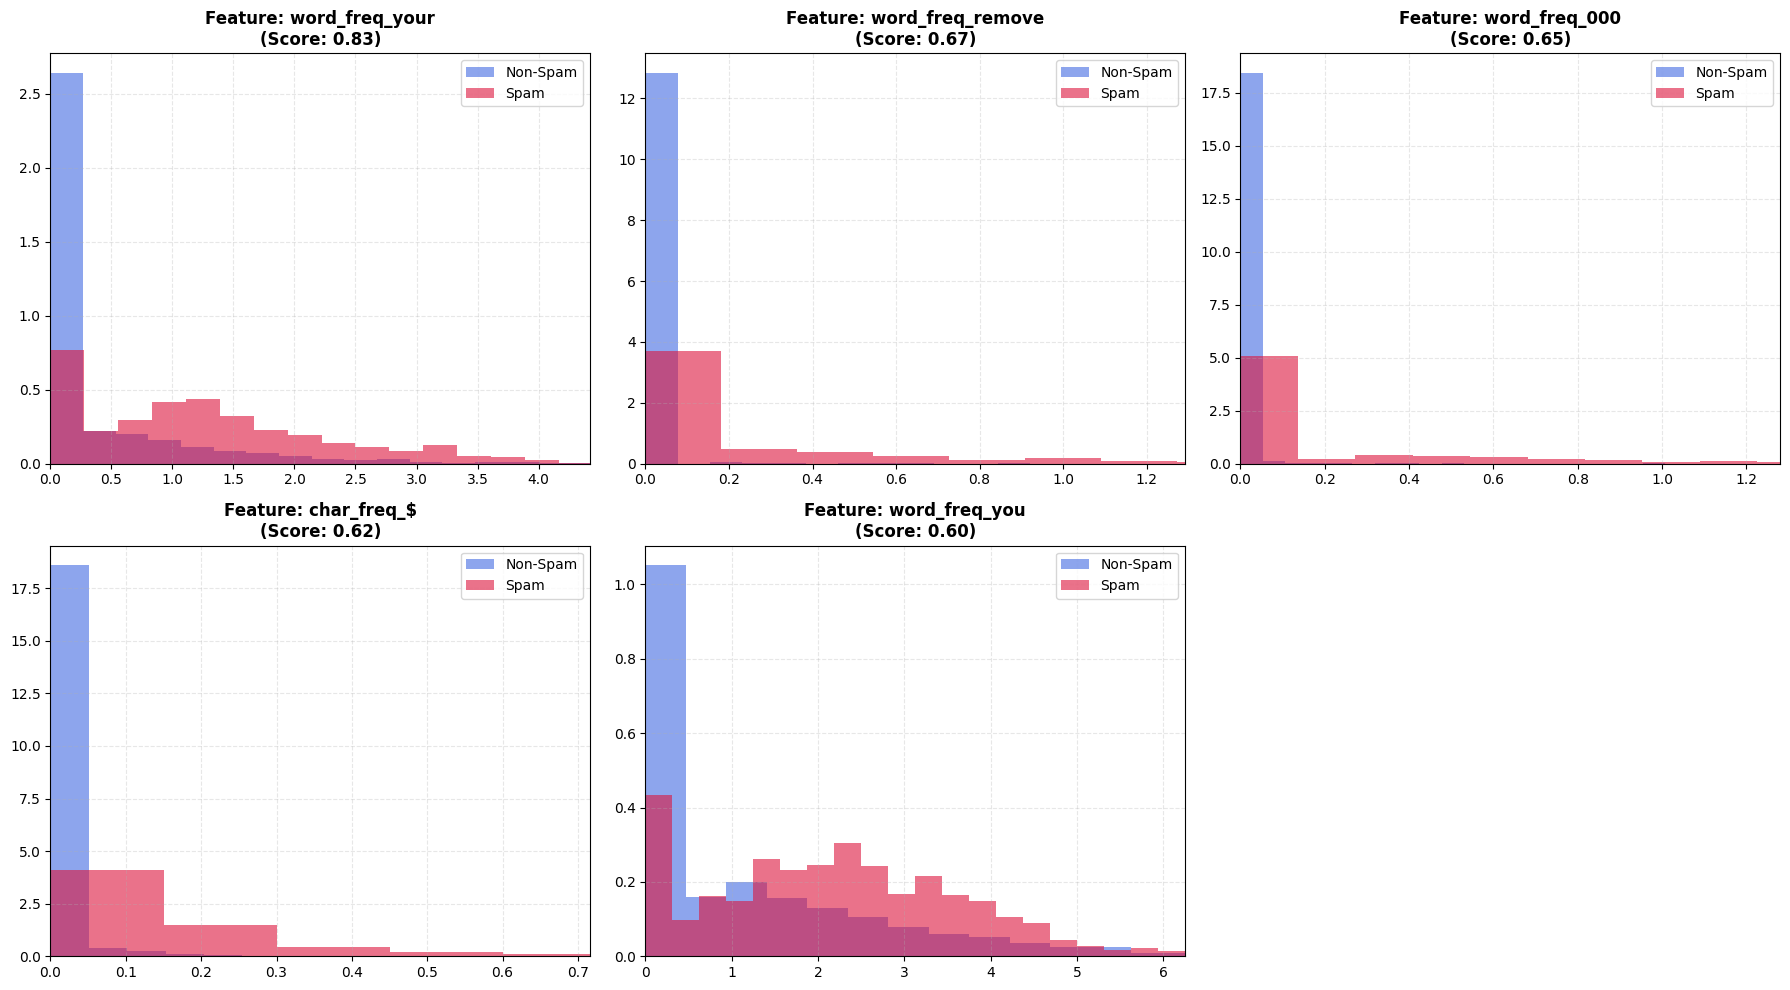

In [ ]:
# TODO: Visualize distributions of top features for spam vs non-spam
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes_flat = axes.flatten()

for i, idx in enumerate(top_5_indices):
    ax = axes_flat[i]
    feat_name = feature_names[idx]
    score = discriminative_scores[i][1]
    
    # extrate data
    spam_data = X_train[y_train == 1, idx]
    non_spam_data = X_train[y_train == 0, idx]
    
    # (Histograms)
    # bins=40: 
    # density=True: ]
    # alpha=0.6: 
    ax.hist(non_spam_data, bins=40, color='royalblue', alpha=0.6, label='Non-Spam', density=True)
    ax.hist(spam_data, bins=40, color='crimson', alpha=0.6, label='Spam', density=True)
    
    # 
    ax.set_title(f"Feature: {feat_name}\n(Score: {score:.2f})", fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3, linestyle='--')
    
    # 

    max_val = np.percentile(np.concatenate([spam_data, non_spam_data]), 98)
    ax.set_xlim(0, max_val)

# 
axes_flat[5].axis('off')

plt.tight_layout()
plt.show()


## Summary and Discussion

### Results Table
| Metric | Value |
|--------|-------|
| Accuracy | 0.8217 |
| Precision | 0.7233 |
| Recall | 0.9385 |
| F1-Score | 0.8170 |
 

### Top 5 Discriminative Features
1. word_freq_your
2. word_freq_remove
3. word_freq_000
4. char_freq_$
5. word_freq_you

### Discussion
*Answer these questions:*
1. Why is Naive Bayes effective for spam detection despite the independence assumption?

It is because the distribution of high-demension is hard to be calculated and the independence assumption will help us simplify this problem. Additionally, we don't need accurate probability estimates, only the correct ranking

2. What are the limitations of your implementation?

- Gaussian Assumption: We assumed all features follow a Gaussian (Normal) distribution. However, word frequencies often follow a Zipfian (power-law) distribution or are heavily skewed towards zero (many zeros, few positive values). A Gaussian model might fit this data poorly.

- Feature Independence: The model ignores correlations. For example, the words "credit" and "card" are highly correlated, but the model treats them as independent pieces of evidence, potentially "double counting" their signal.

- Zero-Frequency Handling: Although we added epsilon to variance, if a word never appears in the training set for a class, the Gaussian probability density might still be numerically unstable or extremely small without careful handling.

3. How could you improve the classifier?

- Data Transformation: Apply a Log-transformation ($log(x+1)$) or Box-Cox transformation to the features to make their distribution more "Gaussian-like" before training.

- Feature Selection: Remove non-informative features (noise) that might confuse the model, as seen in the "discriminative score" analysis.

- Use Different Variations: For count data (word frequencies), a Multinomial Naive Bayes (discretizing the continuous features into bins) often performs better than Gaussian Naive Bayes because it models counts directly.

4. What did you learn from this exercise?

- Numerical Stability: I learned why computing with Log-Probabilities is essential to avoid numerical underflow when multiplying many small probabilities in high-dimensional spaces.

- Vectorization: Implementing the algorithm using NumPy matrix operations (broadcasting) is significantly more efficient and readable than using nested loops.